## Deciding on parameter K in K-Mean

In this Notebook, we will discover the selection of Hyperparameter K in K-Means Clustering.

### Import the relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

### Load the data

In [2]:
data = pd.read_csv('Countries-exercise.csv')
data.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


In [3]:
data1 = data.copy()

### Plot the data

Plot the <i>'Longtitude'</i> and <i>'Latitude'</i> columns. 

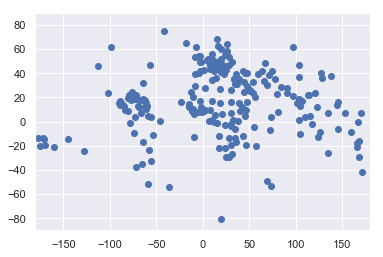

In [4]:
plt.scatter(data1.Longitude, data1.Latitude)
plt.xlim(-180, 180)
plt.ylim(-90,90)
plt.show()

### Select the features

Create a copy of that data and remove all parameters apart from <i>Longitude</i> and <i>Latitude</i>.

In [5]:
x1 = data1.iloc[:,1:3]
x1.head()

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450


## Clustering

### Choosing K value

Unlike in the previous notebook, here we will choose the hyper-parameter K (number of clusters), through a method called 'Elbow Method'.

Within-cluster Sum of Squares (WCSS) is the value we want to minimize, just like SSE or SST in regression models. 
We also want to keep the number of clusters low too. The 'Elbow Method' is the most generic method for this decision.

In [9]:
wcss = []
cluster_count = 11
for i in range (1,cluster_count):
    kmeans= KMeans(i)
    kmeans.fit(x1)
    wcss_iter = kmeans.inertia_   # kmeans.inertia_ shows the WCSS value according to number of clusters chosen
    wcss.append(wcss_iter)
    
wcss

[1413859.6798344273,
 657012.0797586325,
 325235.52237055893,
 256675.966051002,
 192217.1197012072,
 152783.72860117102,
 127549.31394168368,
 102913.61962302422,
 84927.05022223276,
 76439.49644818818]

### Plotting (The Elbow Method)

Text(0, 0.5, 'Within-cluster Sum of Squares')

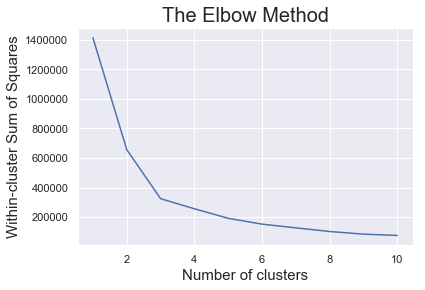

In [10]:
number_clusters = range(1,cluster_count)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('Number of clusters', fontsize=15)
plt.ylabel('Within-cluster Sum of Squares', fontsize=15)

The shape of an elbow lead us to choose K as either 2 or 3. K=3 seems better better in terms of WCSS, which is the half of K=2. But let's also see the graphical representation of both too. 

### Plotting and Comparing for possible K values

##### K = 2

In [33]:
kmeans_2clusters = KMeans(2)
kmeans_2clusters.fit(x1)
identified_clusters = kmeans_2clusters.fit_predict(x1)

data_with_clusters1 = data.copy()
data_with_clusters1['Cluster'] = identified_clusters

##### K = 3

In [32]:
kmeans_3clusters = KMeans(3)
kmeans_3clusters.fit(x1)
identified_clusters = kmeans_3clusters.fit_predict(x1)

data_with_clusters2 = data.copy()
data_with_clusters2['Cluster'] = identified_clusters

In [31]:
print('WCSS for 2 Clusters: {}\nWCSS for 2 Clusters: {}'.format(kmeans_2clusters.inertia_, kmeans_3clusters.inertia_))

WCSS for 2 Clusters: 657012.0797586325
WCSS for 2 Clusters: 325235.52237055893


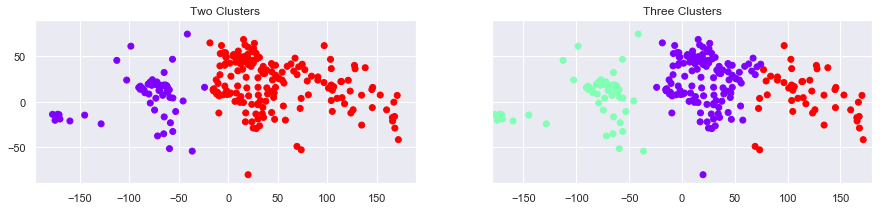

In [30]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize= (15,3))
plt.xlim(-180,180)
plt.ylim(-90, 90)

ax1.scatter(data['Longitude'], data['Latitude'], c=data_with_clusters1['Cluster'], cmap = 'rainbow')
ax1.set_title('Two Clusters')

ax2.scatter(data['Longitude'], data['Latitude'], c=data_with_clusters2['Cluster'], cmap = 'rainbow')
ax2.set_title('Three Clusters')

plt.show()

As final comments WCSS is 657K for K = 2 and 325K for K = 3. According to the purpose of clustering, 2 or 3 might be selected for K value. Still, due to much lower WCSS, K=3 seems like a bit better option.